# XSF comparator will compare two variables from two XSF files and display their differences


## imports some library

In [5]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

## set the files paths

In [6]:
base_path="D://DATA//file//XSF//XSFValidation//"
#base_path="D://DATA//file//XSF//OpenBST//"
#base_path="Z://database//Globe_Unit_Test_Dir//file//xsf//XSFValidation//"
filename="out.kmall.xsf"
filenameALL="out.all.xsf"
file_path= base_path + filename
file_path_ALL= base_path + filenameALL

Ignore some Water column variables that are considered as special case (v_len encoding variables)


In [7]:
ignorevariable= ["backscatter_count","backscatter_offset", "backscatter_r"]


ignore variable  backscatter_count
ignore variable  backscatter_offset
ignore variable  backscatter_r


C:\Tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
C:\Tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
C:\Tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered
C:\Tools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  # This is added back by

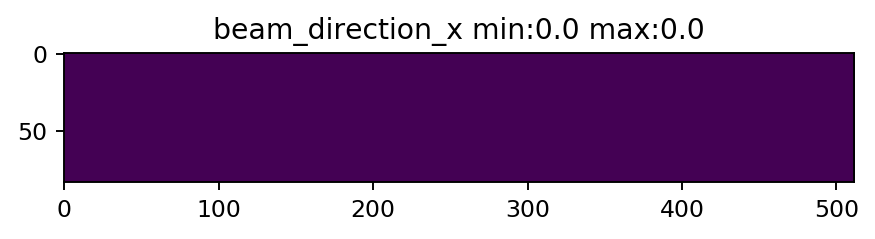

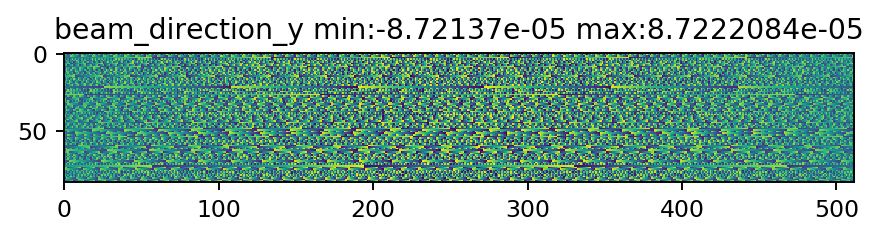

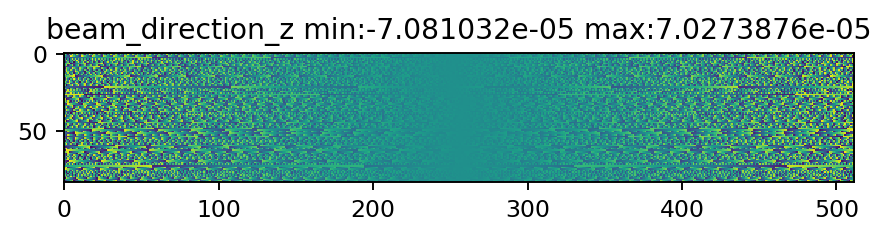

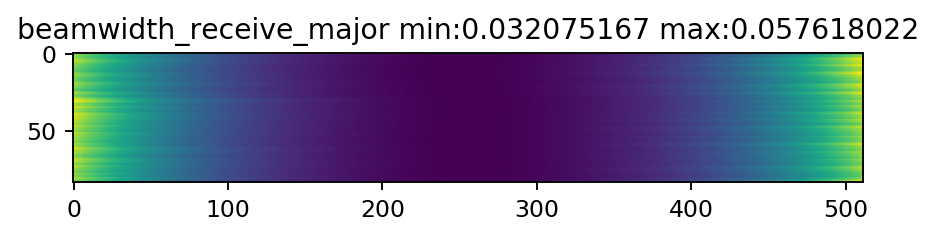

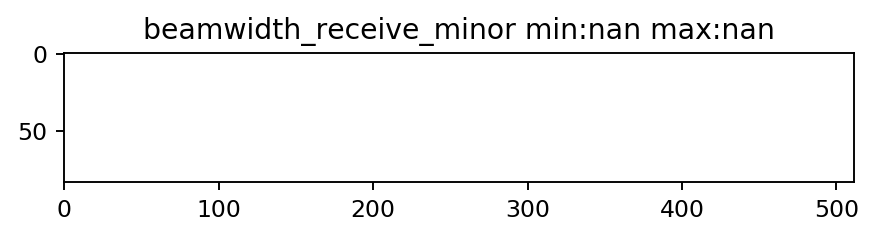

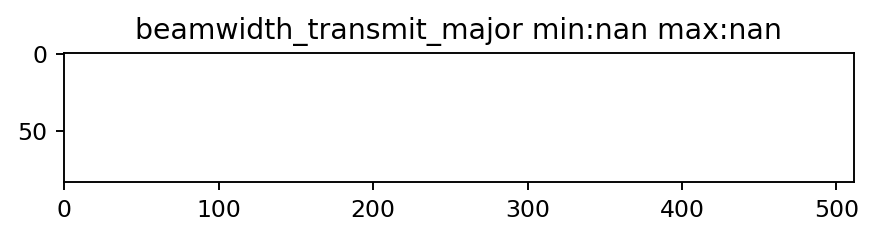

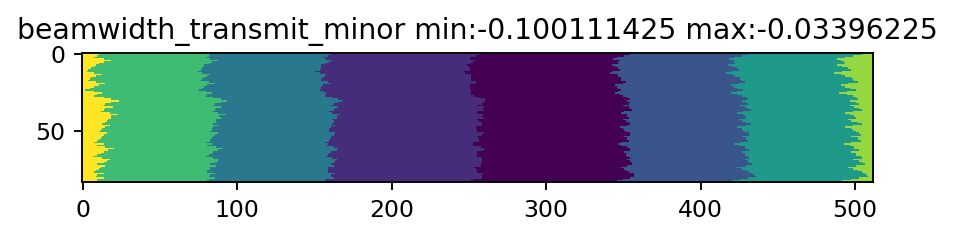

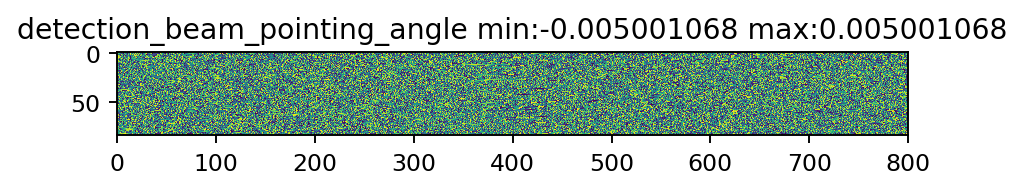

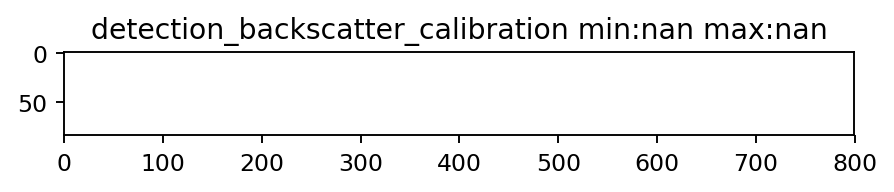

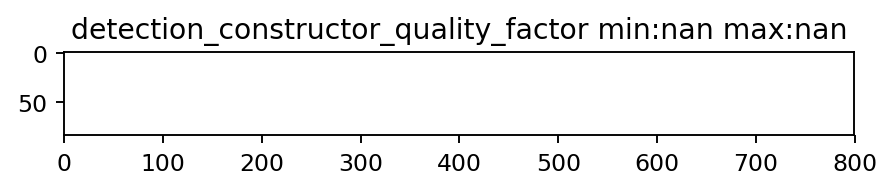

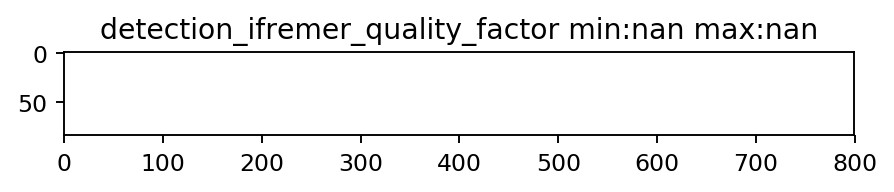

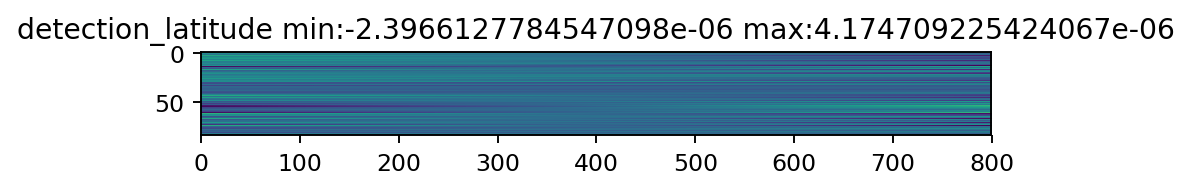

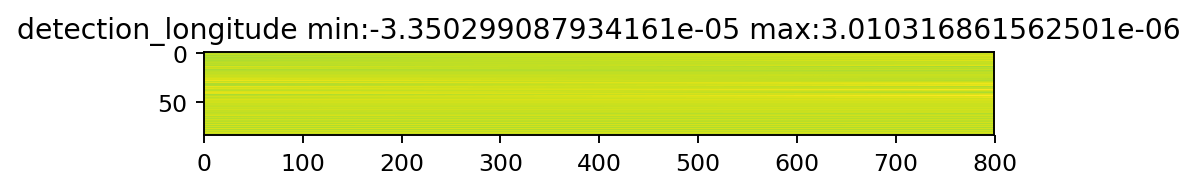

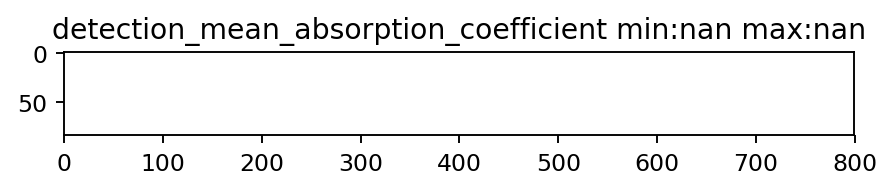

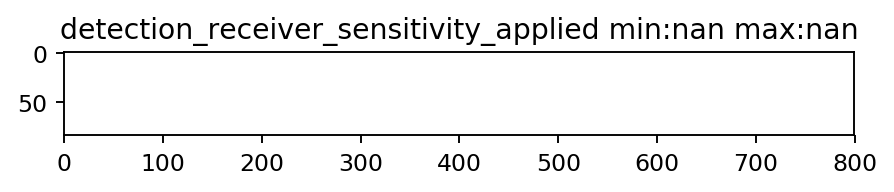

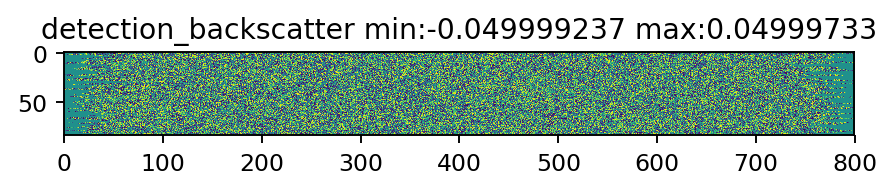

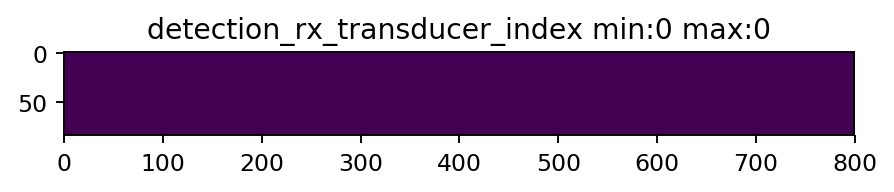

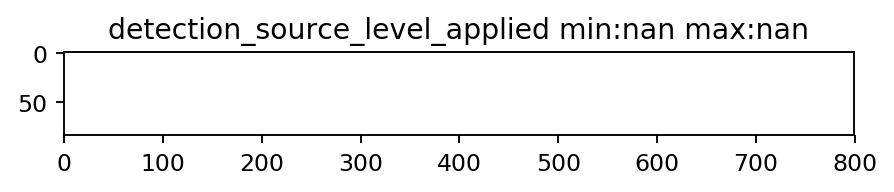

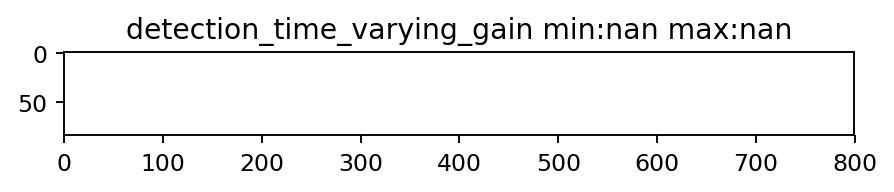

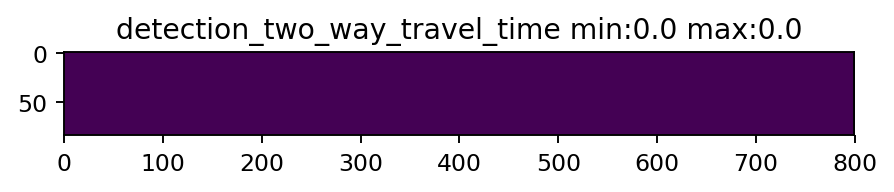

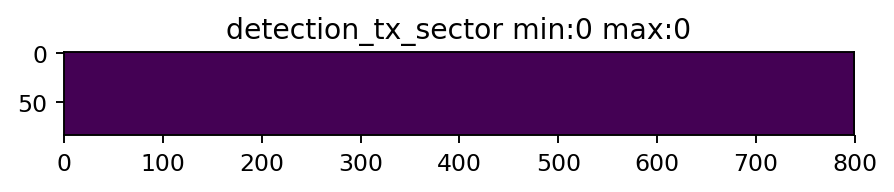

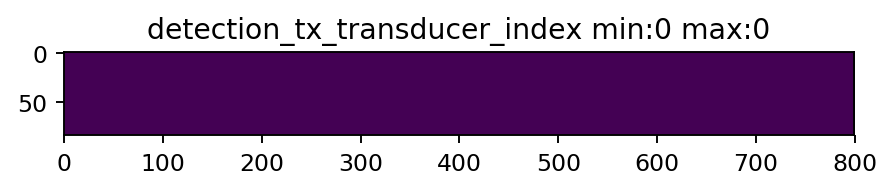

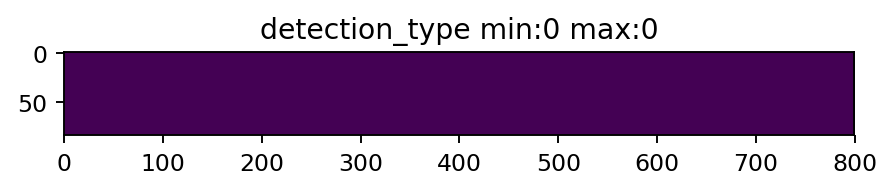

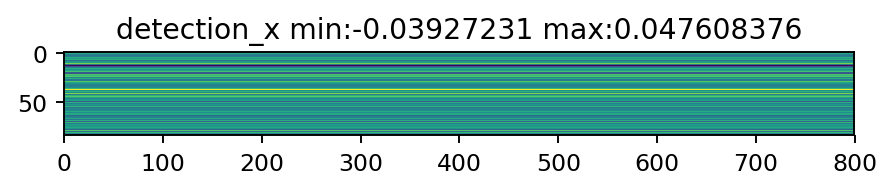

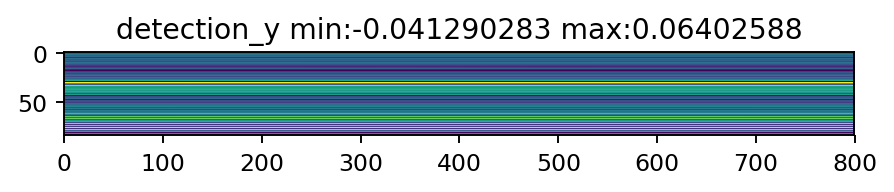

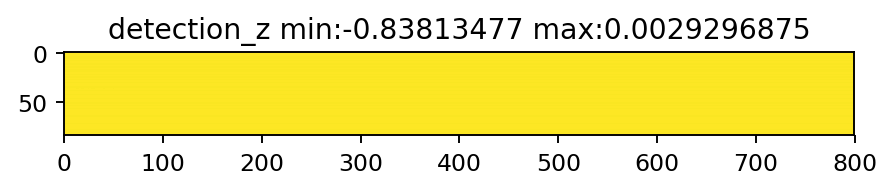

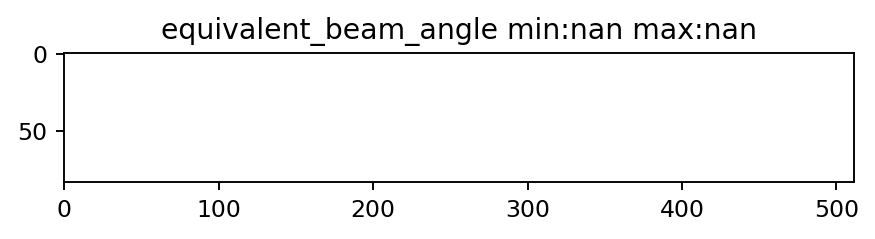

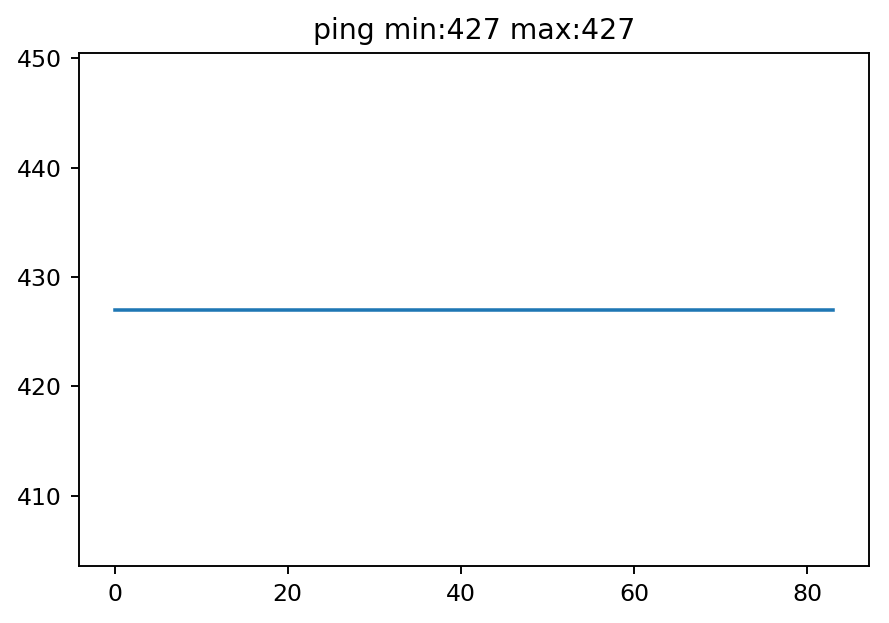

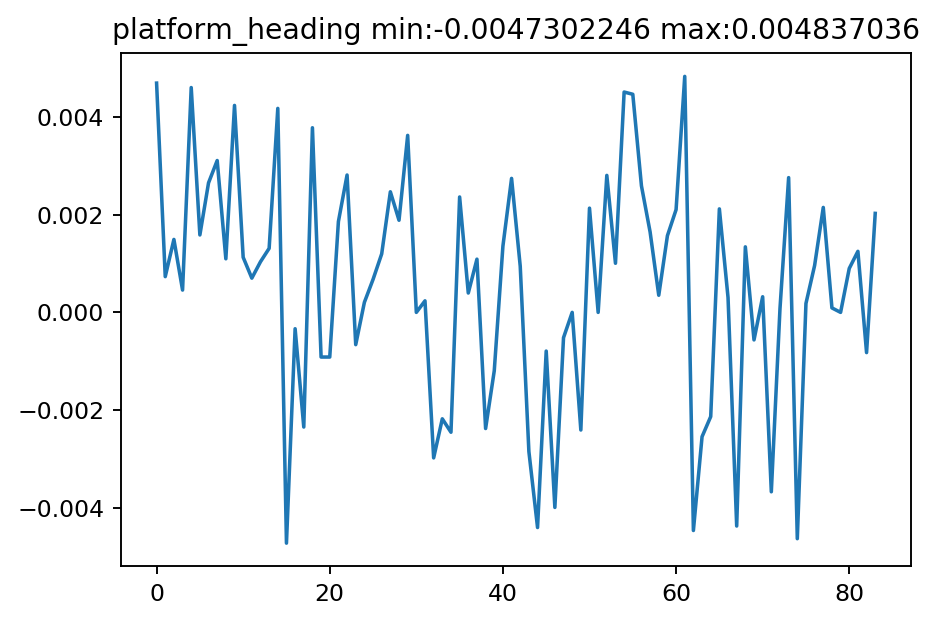

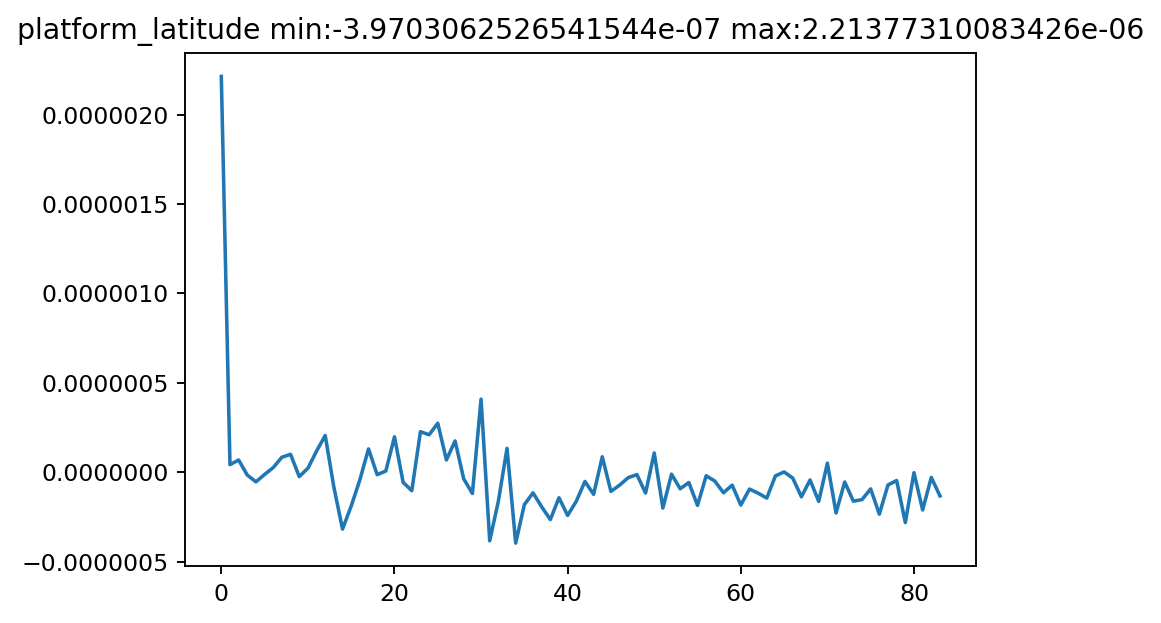

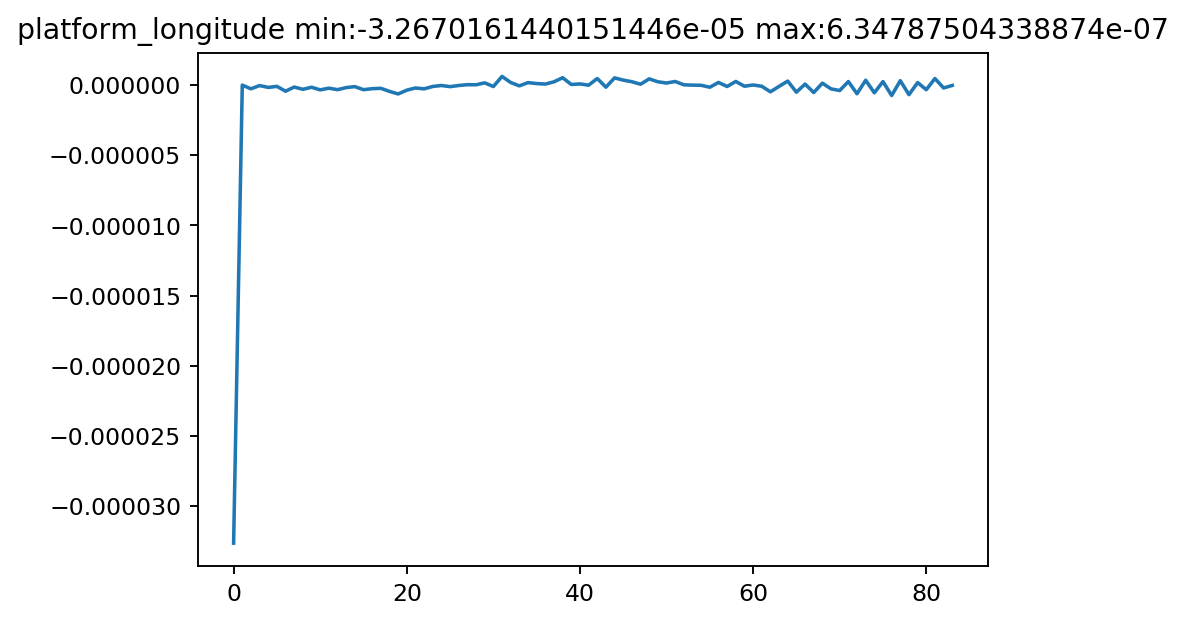

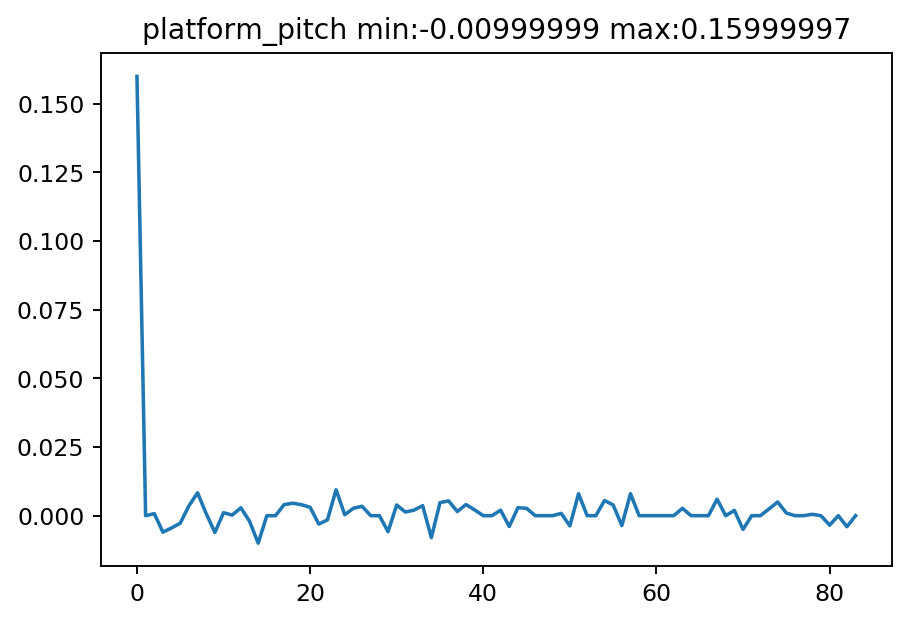

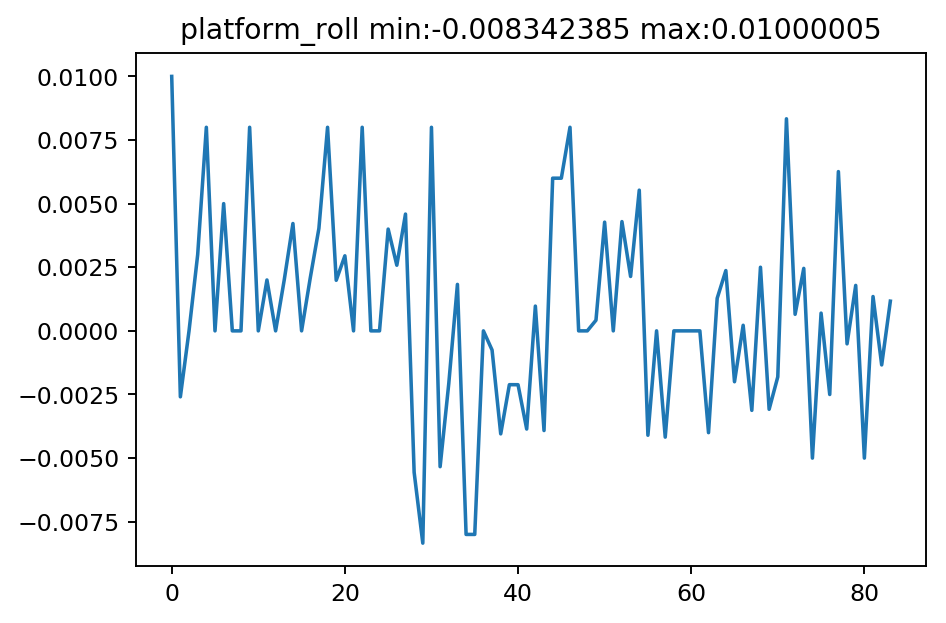

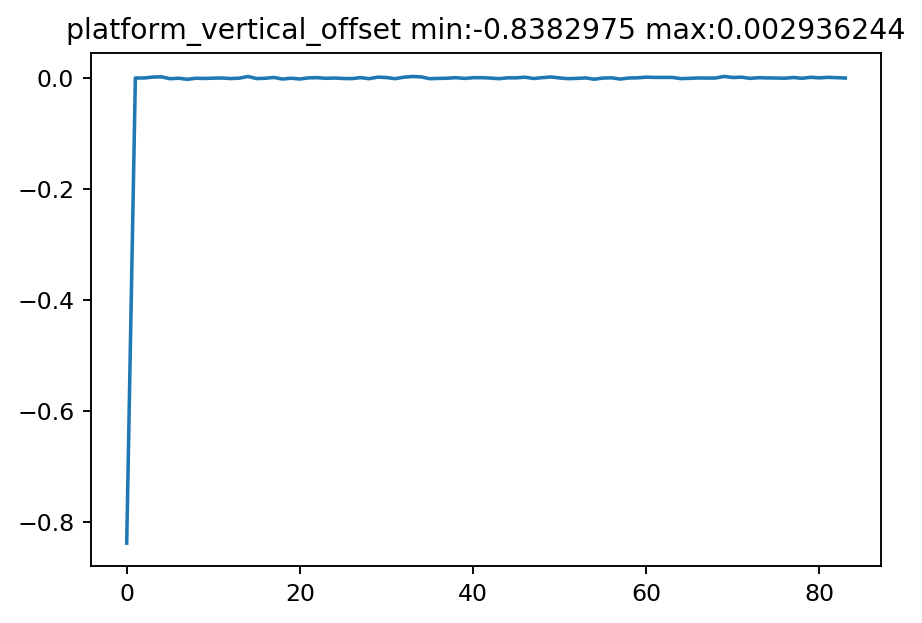

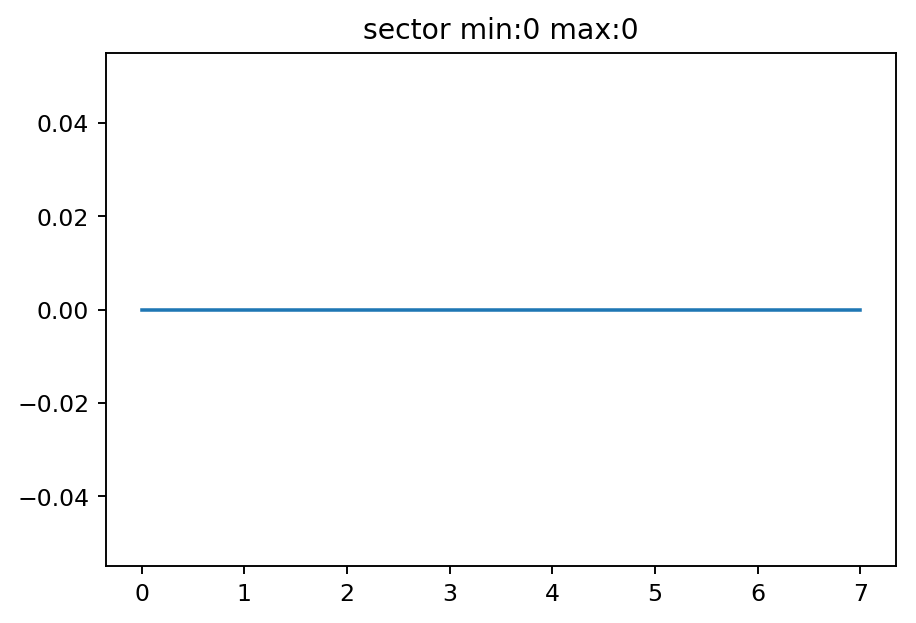

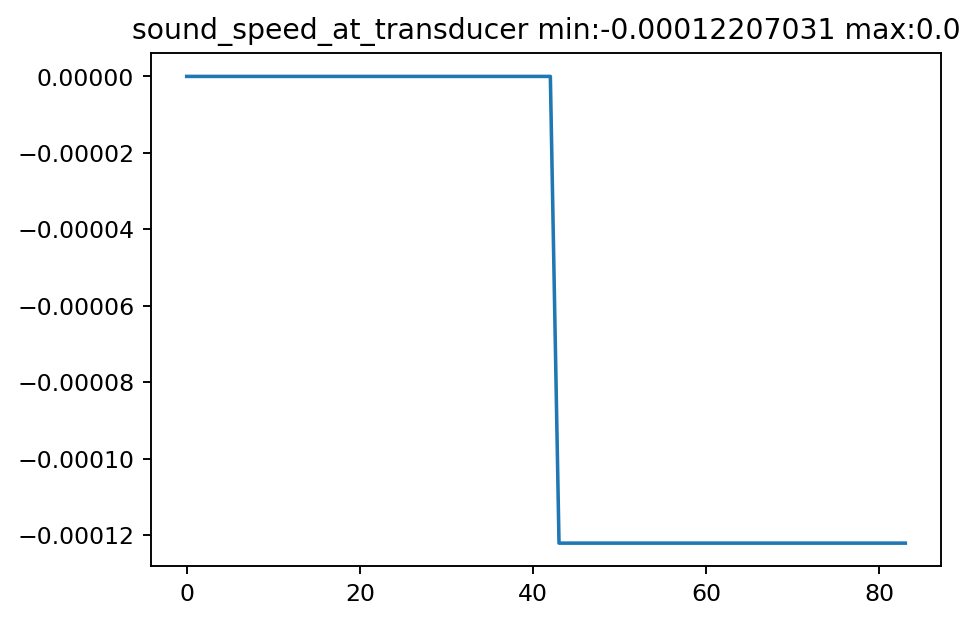

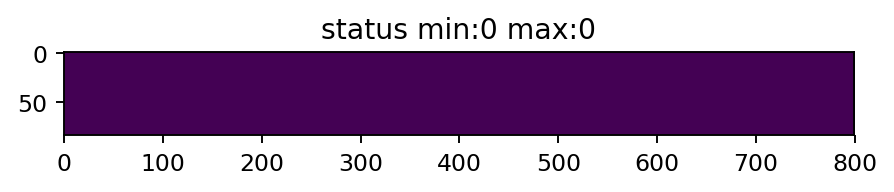

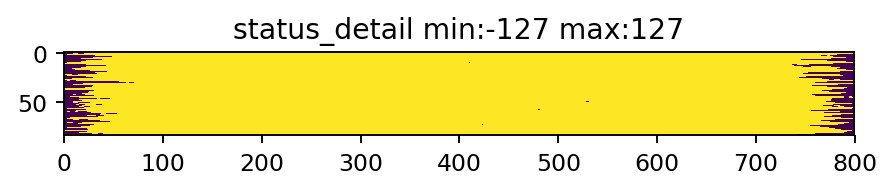

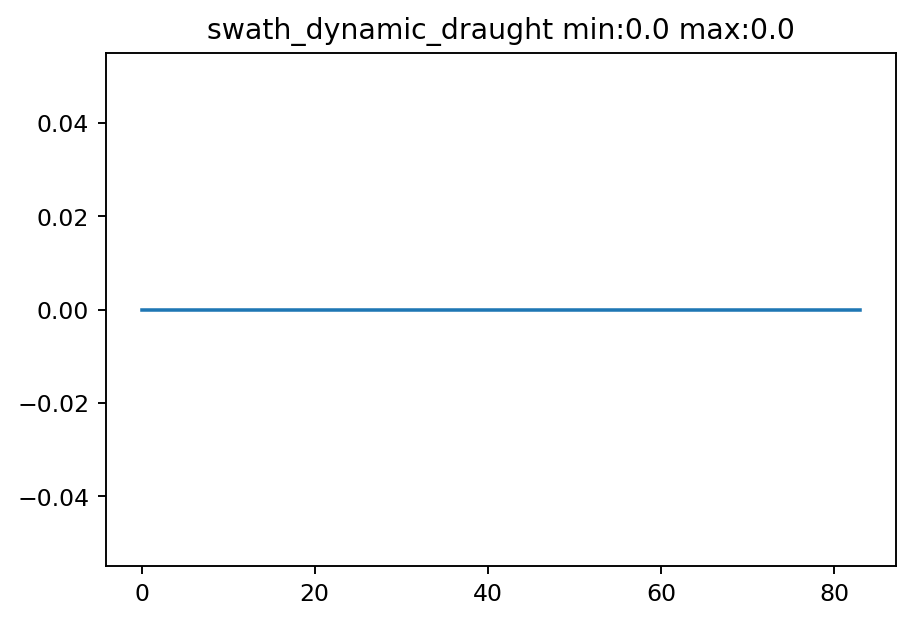

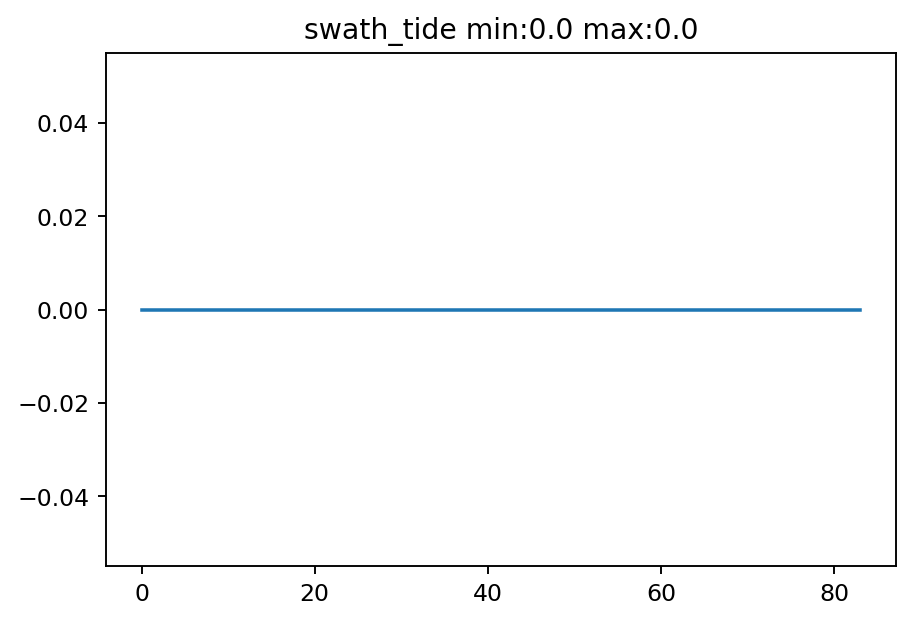

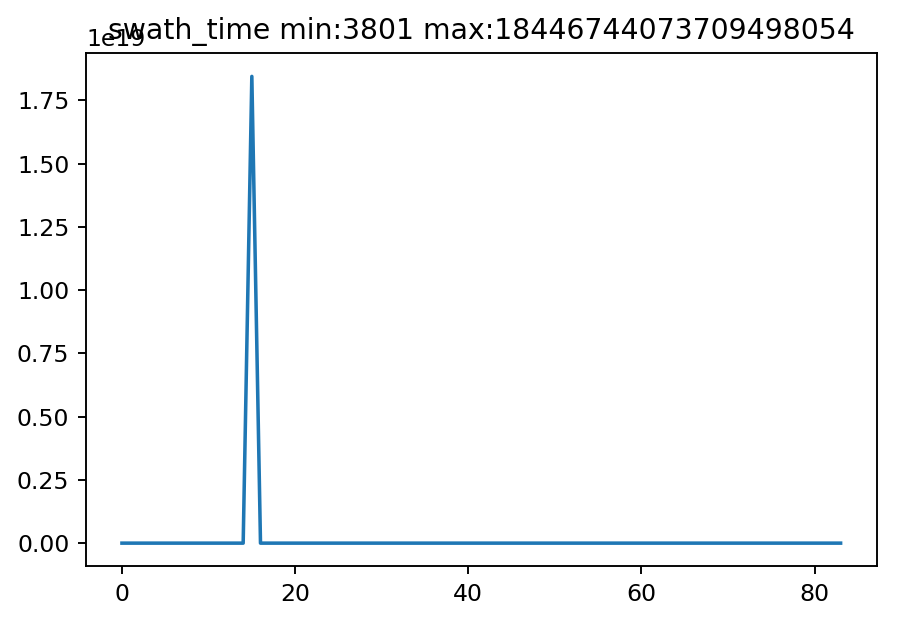

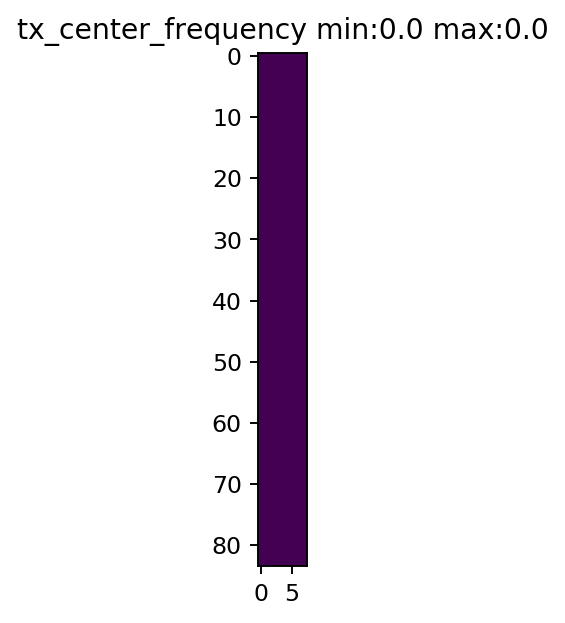

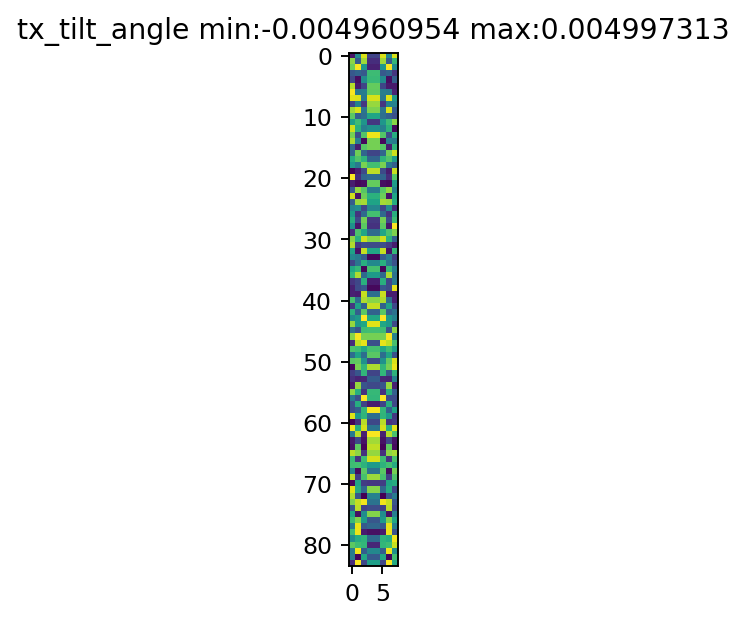

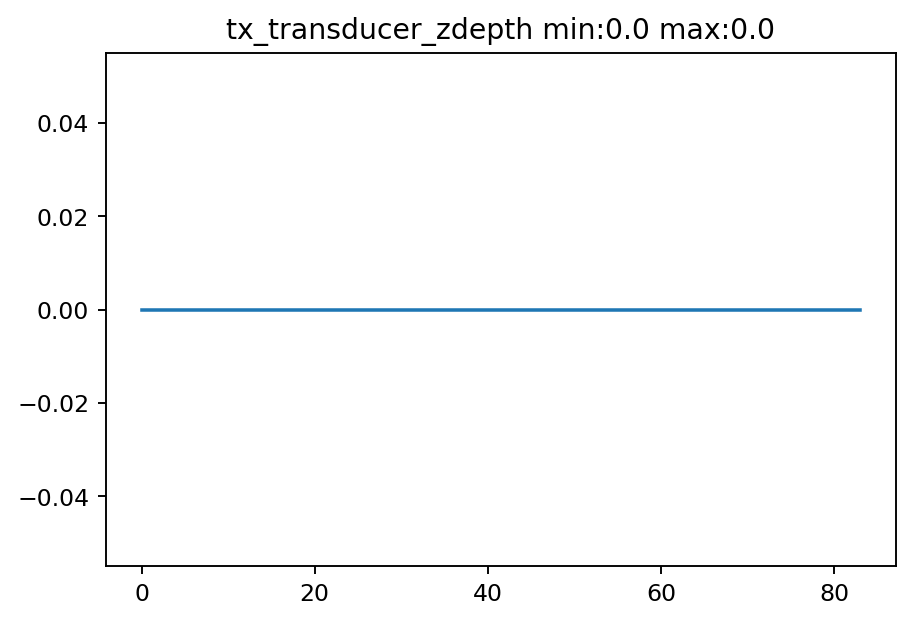

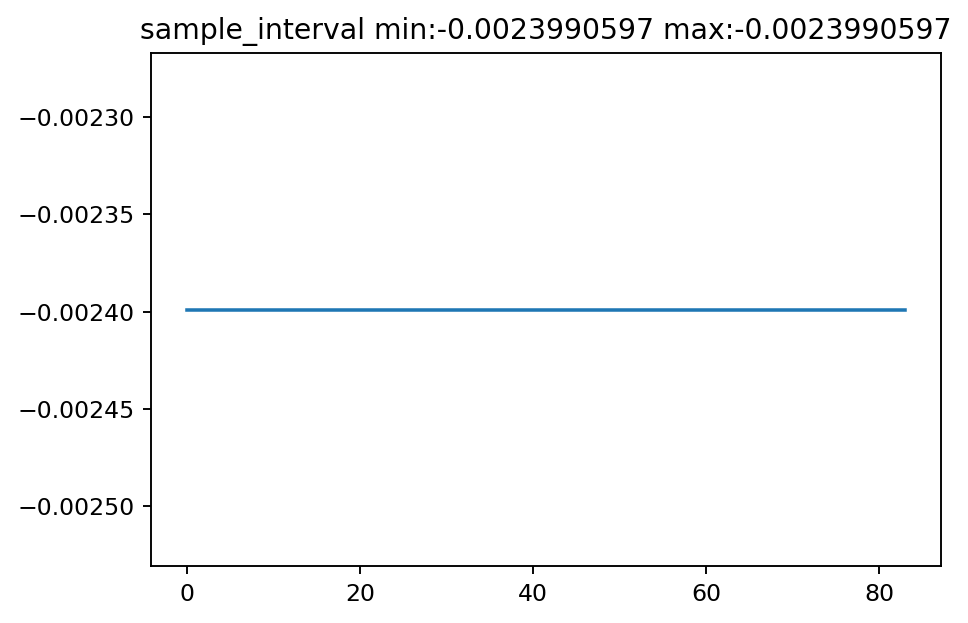

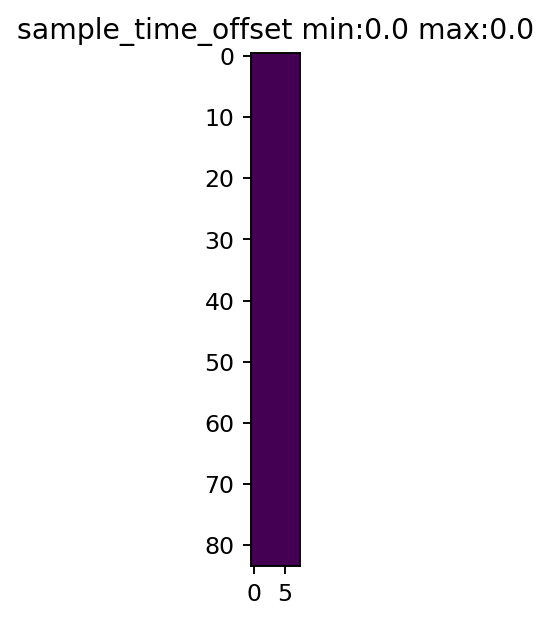

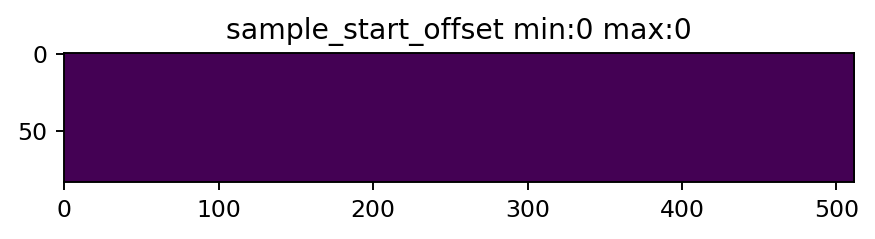

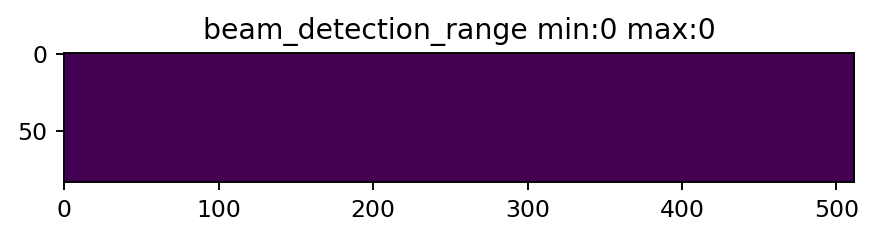

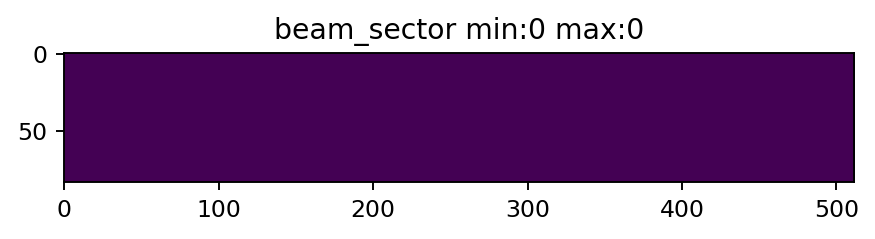

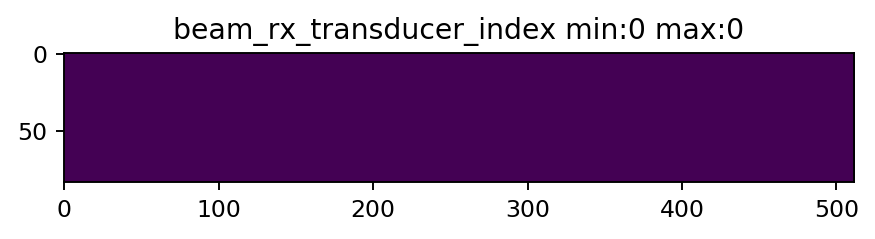

In [8]:
with nc.Dataset(file_path) as dataset, nc.Dataset(file_path_ALL) as datasetALL:
    #get beamGroup dataset
    beamGroup = dataset['/root/sonar/beam/Beam_group1/']
    beamGroupSecond = datasetALL['/root/sonar/beam/Beam_group1/']
    plt.rcParams['figure.dpi'] = 170

    for variable_name in beamGroup.variables:
        if variable_name not in ignorevariable:
                v=beamGroup.variables[variable_name]
                vALL=beamGroupSecond.variables[variable_name]
                vDiff=np.array(v)-np.array(vALL)
                plt.figure()
                try:
                    if len(v.dimensions) ==1:
                        plt.plot(vDiff)
                    else:
                        plt.imshow(vDiff)
                    try:
                       plt.title(variable_name+ " min:" + str(np.nanmin(vDiff))+" max:"+str(np.nanmax(vDiff)))
                    except:
                        plt.title(variable_name+ "Error while computing stats")
                except:
                    print("Error->",variable_name, " ",sys.exc_info()[0])
              

        else:
            print('ignore variable ', variable_name)
